In [1]:
from PIL import ImageGrab
from IPython.display import display, Image

def ins(ratio=1.0):
    im_data = ImageGrab.grabclipboard()
    new_size = tuple([int(i*ratio) for i in im_data.size])
    thumb = im_data.resize(new_size)
    fn = "temp.PNG"
    thumb.save(fn)
    img = Image(filename=fn)
    display(img)

In [2]:
import numpy as np
import math
from sympy import *
from cmath import *
##############################
from scipy.stats import *
from sympy.stats import *
##################################
from itertools import *
from more_itertools import *
from scipy.special import *
from fractions import Fraction
import random
##############################################
import locale as loc
from IPython.display import display, Math, Latex
loc.setlocale(loc.LC_ALL, 'ru')
init_printing(use_unicode=True,use_latex=True)
from scipy.stats import *
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, patches
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
from matplotlib import rcParams
#########################
import locale
locale.setlocale(locale.LC_NUMERIC, 'russian')
plt.rcParams['axes.formatter.use_locale'] = True
#########
plt.rcParams["lines.linewidth"] = 3.5
#########
plt.rcParams['font.size'] = 36
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
###################
from sympy.combinatorics import *
from sympy.interactive import init_printing
init_printing(perm_cyclic=False, pretty_print=True)


In [3]:
from scipy.stats import norm, uniform,expon,cauchy

In [4]:
Z=norm()
U=uniform()
lam=2
mean=1/lam
Y=expon(loc=0,scale=mean)
C=cauchy()

In [5]:
C.rvs(size=10)

array([-8.33017636e-01, -1.55769745e+00,  1.12754242e+01,  8.36777414e-01,
        3.29186738e-02,  7.65573632e+01, -1.21793419e+00, -6.00206510e-01,
        3.30590494e+00,  2.83196161e-01])

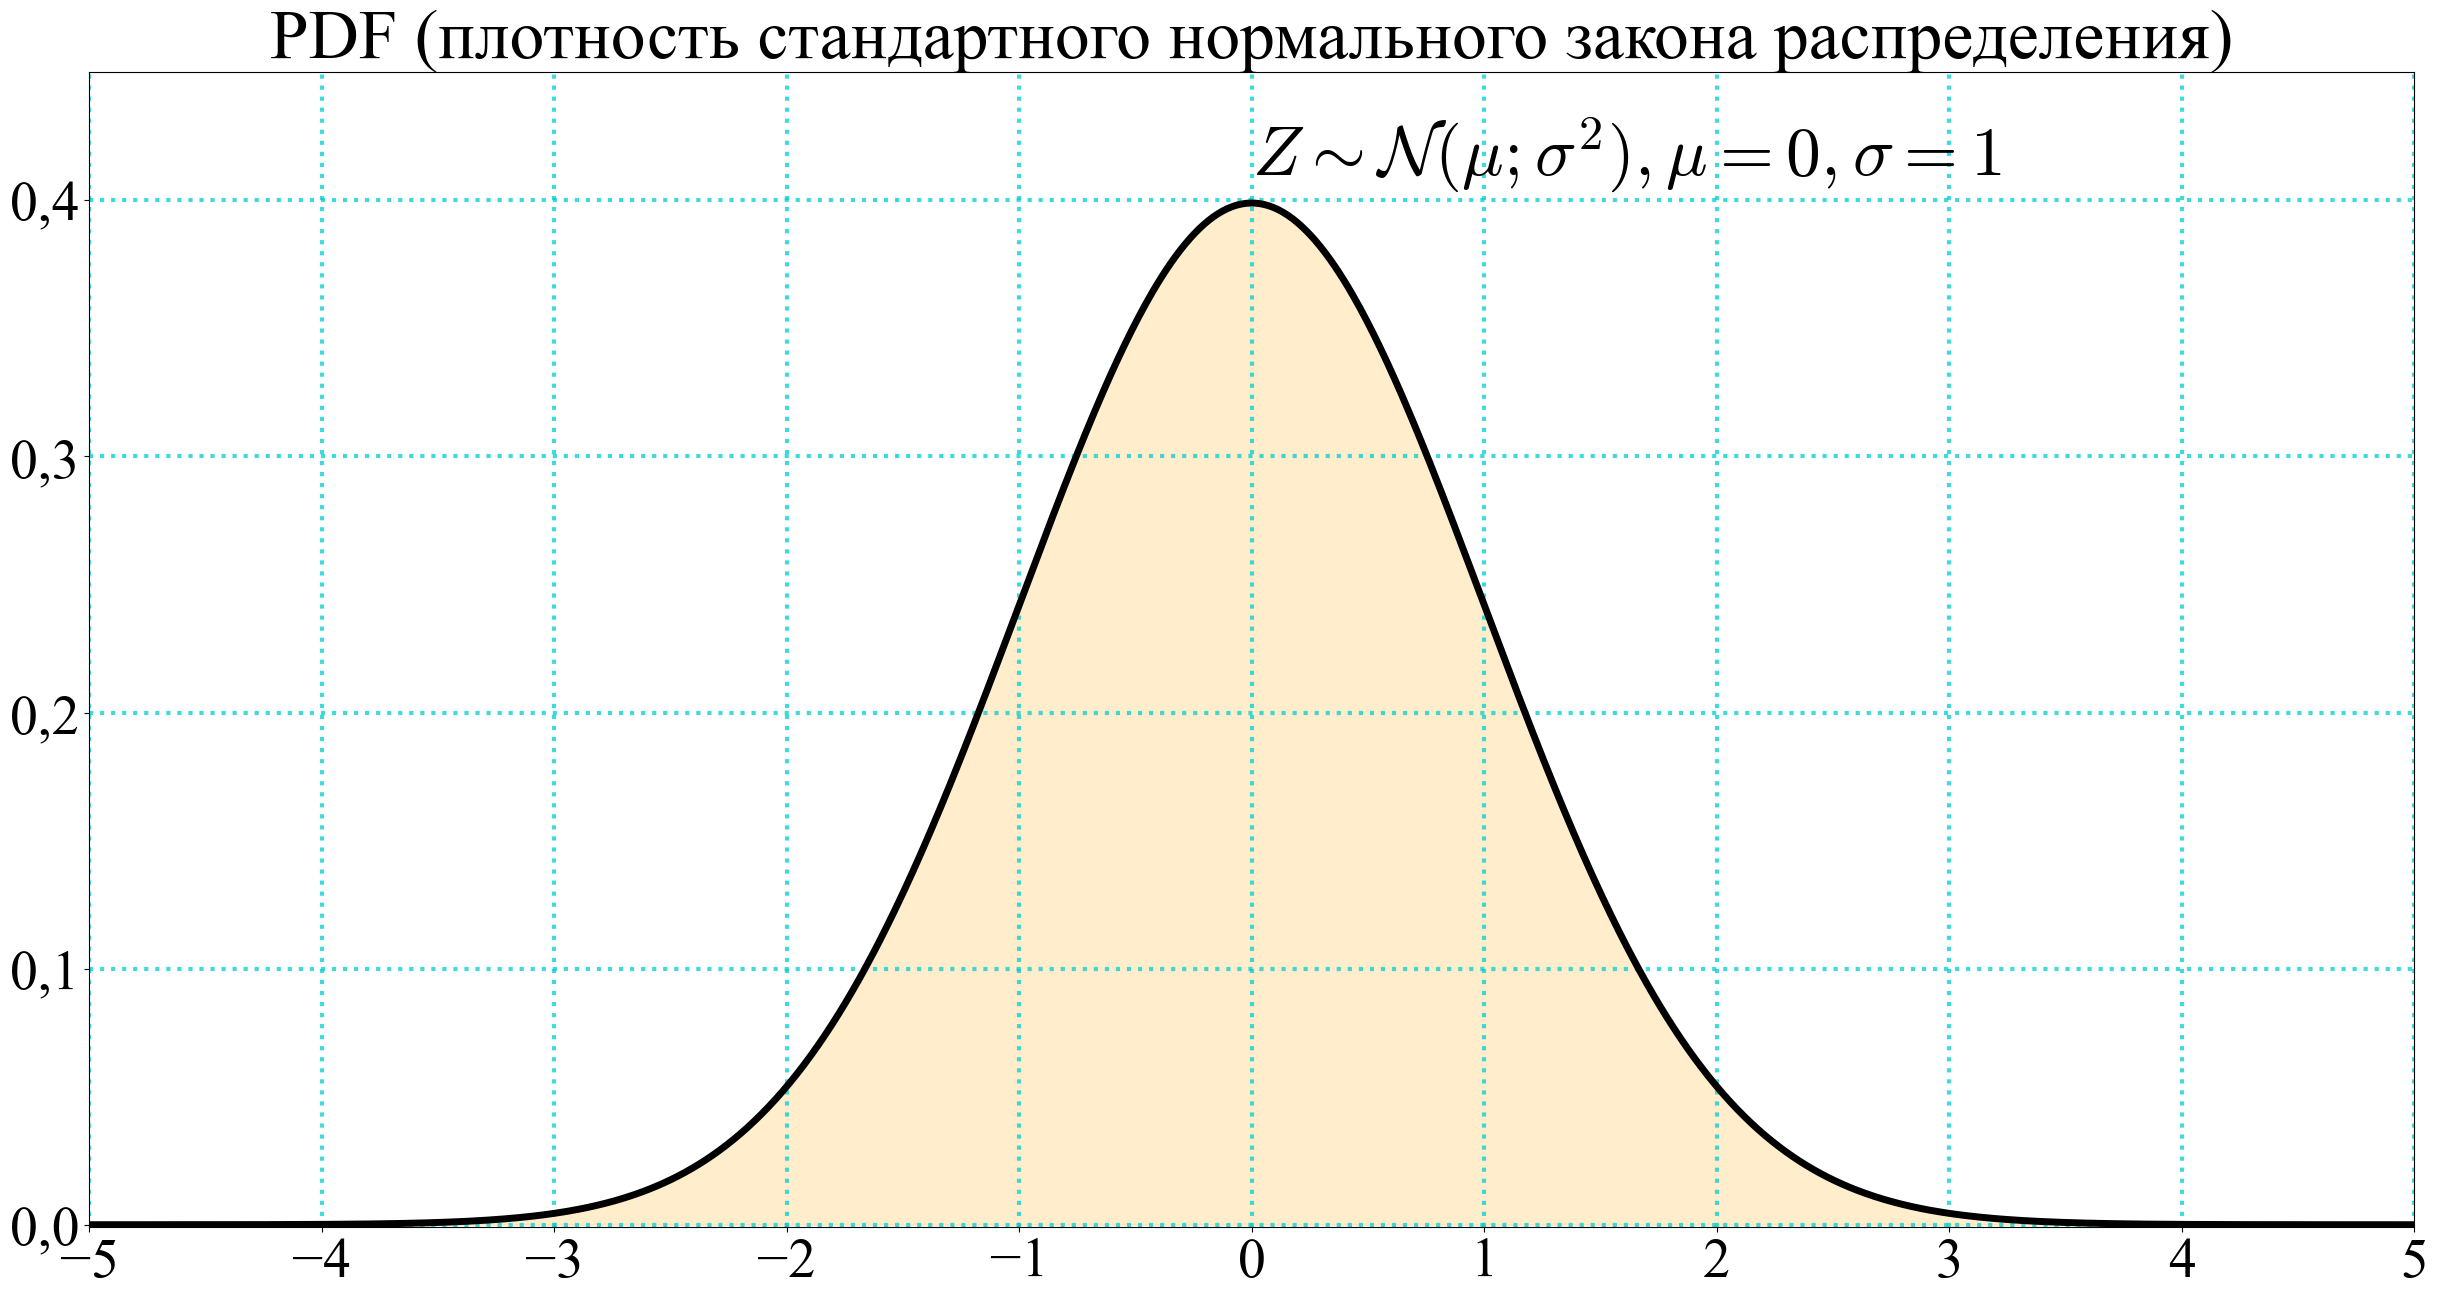

In [13]:
x= np.linspace(-5,5, 1000)
y=Z.pdf(x)
fig, ax = plt.subplots(figsize=(30, 15))
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=3)
plt.ylim(-0.001,0.45)
plt.xlim(-5,5)
plt.text(0, .41, r'$Z\sim {\cal N}(\mu;\sigma^2), \mu=0,\sigma=1$',fontsize=50)
plt.tick_params(labelsize = 40)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.title('PDF (плотность стандартного нормального закона распределения)',fontsize=50)
plt.plot(x, y,'k-', linewidth=5)
y0=0
plt.fill_between(x,y,y0, color='orange', alpha=0.2)
plt.show()

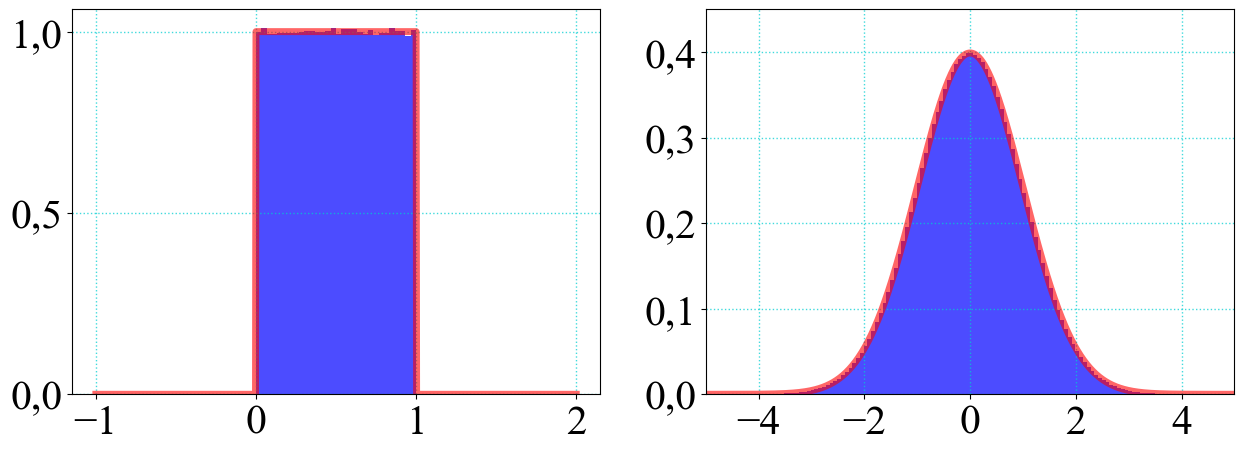

In [20]:
#fig,ax =plt.subplots(figsize=(30, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.tick_params(labelsize = 30)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax1.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)

plt.ylim(0.,1.1)
plt.xlim(0,1)
x = np.linspace(-1, 2, 1000)
r = U.rvs(size=1000000)
ax1.plot(x, U.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
ax1.hist(r, density=True, alpha=0.7,histtype='stepfilled',color='b',bins=30)

ax2.tick_params(labelsize = 30)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax2.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)

plt.ylim(0.,0.45)
plt.xlim(-5,5)
x = np.linspace(-5, 5, 1000)
r = Z.rvs(size=10000000)
ax2.plot(x, Z.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
ax2.hist(r, density=True, alpha=0.7,histtype='stepfilled',color='b',bins=150)

plt.show()

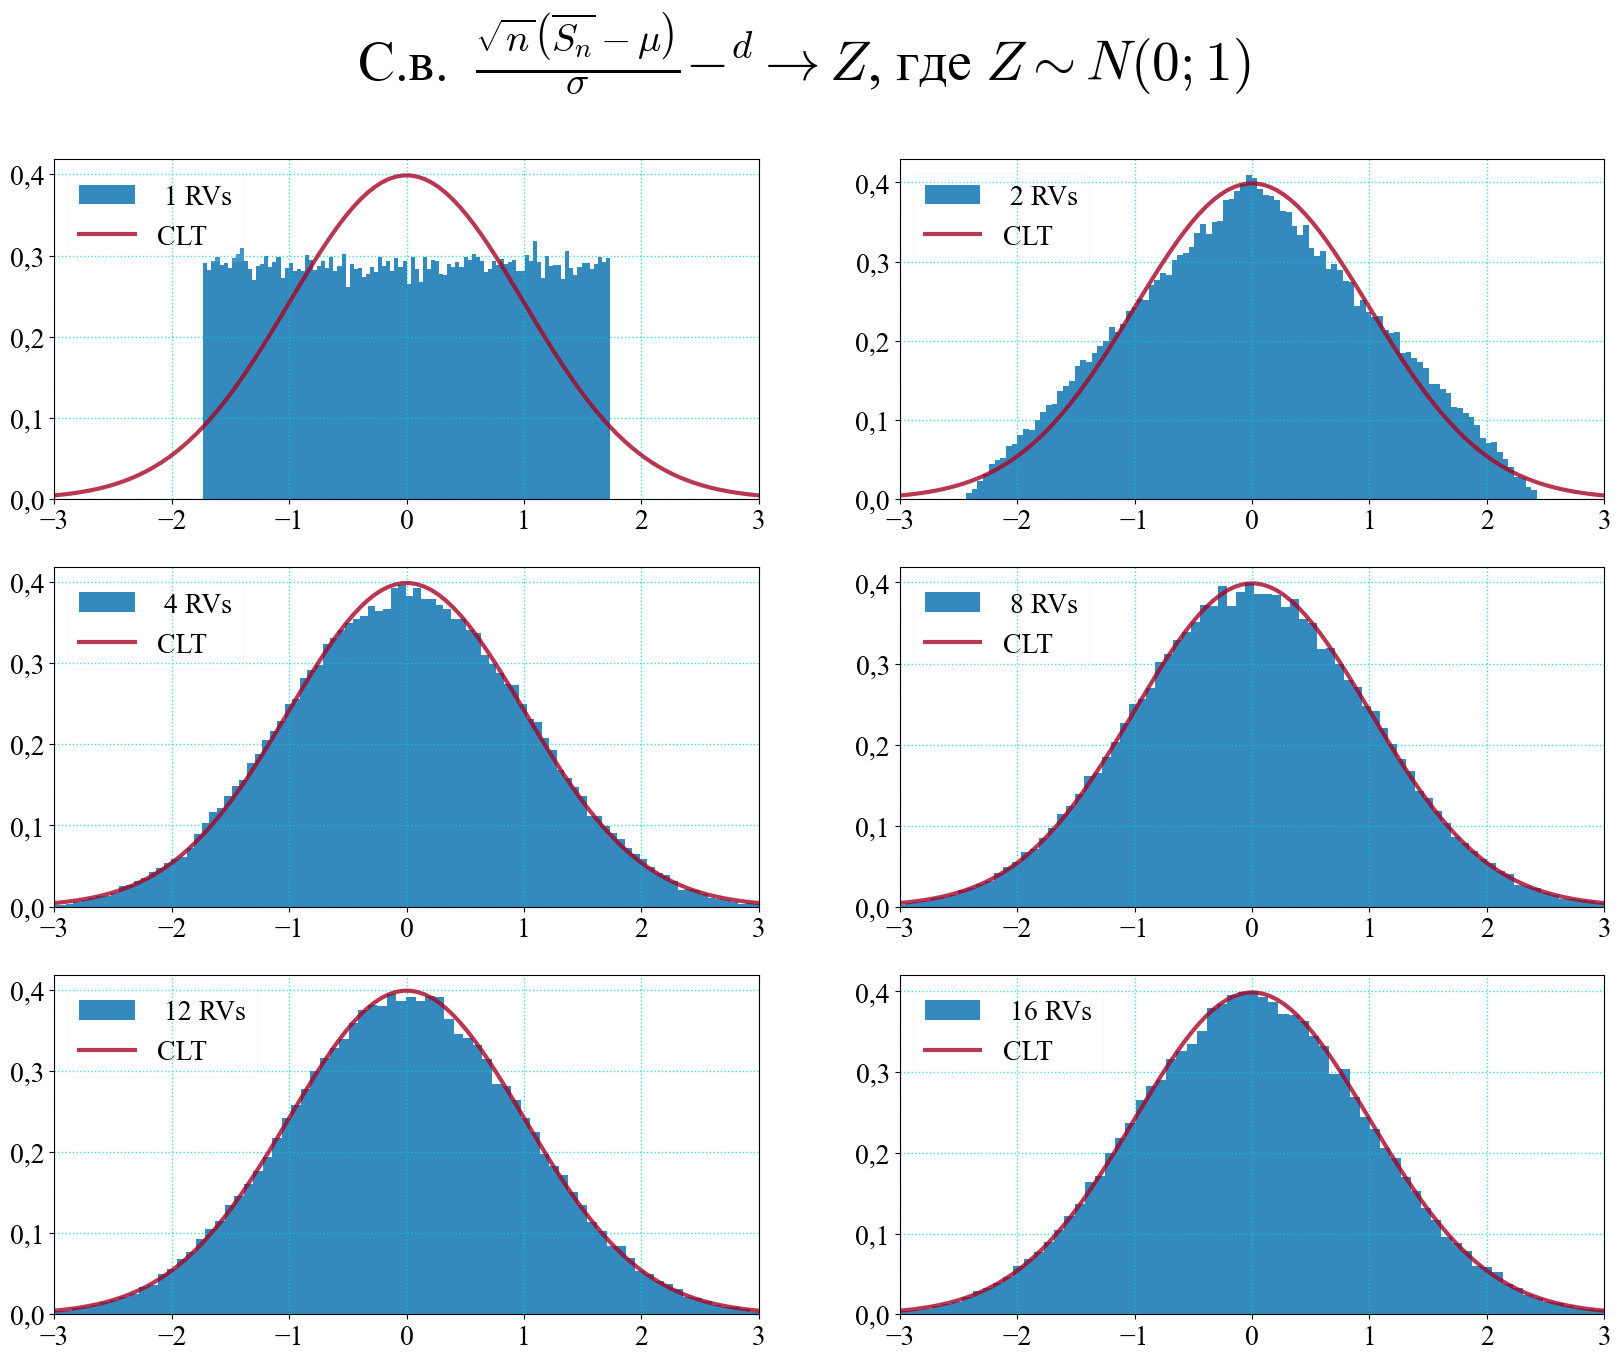

In [15]:
f = plt.figure(figsize=(20, 15))
 
def plotHist(nr, N, n_, mean, var0, x0):
    s = np.zeros((N))
    ax = f.add_subplot(3, 2, n_ )
    plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
    plt.tick_params(labelsize = 20)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1*nr))
    for i in range(N):    
        s[i] =np.sqrt(nr)*(np.mean(U.rvs(size=nr)) - mean)/(np.sqrt(var0))
    plt.hist(s, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(ax.get_yticklabels(), visible=True)
                       
    pdf = 1/np.sqrt(2*np.pi)*np.exp(-(x0)**2/(2))
    plt.plot(x0,pdf,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    #plt.xlabel('r')
    plt.xlim([-3, 3])
    #plt.ylim([0, 15])
    leg = plt.legend(loc="upper left",fontsize=20)
    leg.get_frame().set_alpha(0.1)

    
N = 100000   
nrvs = ([1, 2, 4, 8, 12, 16])

mean, var0 = 1/2, 1/12  # 
x0 = np.linspace(-3, 3, 100)

for i in range(np.size(nrvs)):
    plotHist(nrvs[i], N, i+1, mean, var0, x0)

plt.suptitle(r'С.в.  $\frac{\sqrt{n}\left(\overline{S_n}-\mu\right)}{\sigma} {-}^d\rightarrow Z$, где $Z\sim {\cal N}(0;1)$',fontsize=40);
f.savefig("CLT_1.pdf", bbox_inches='tight')

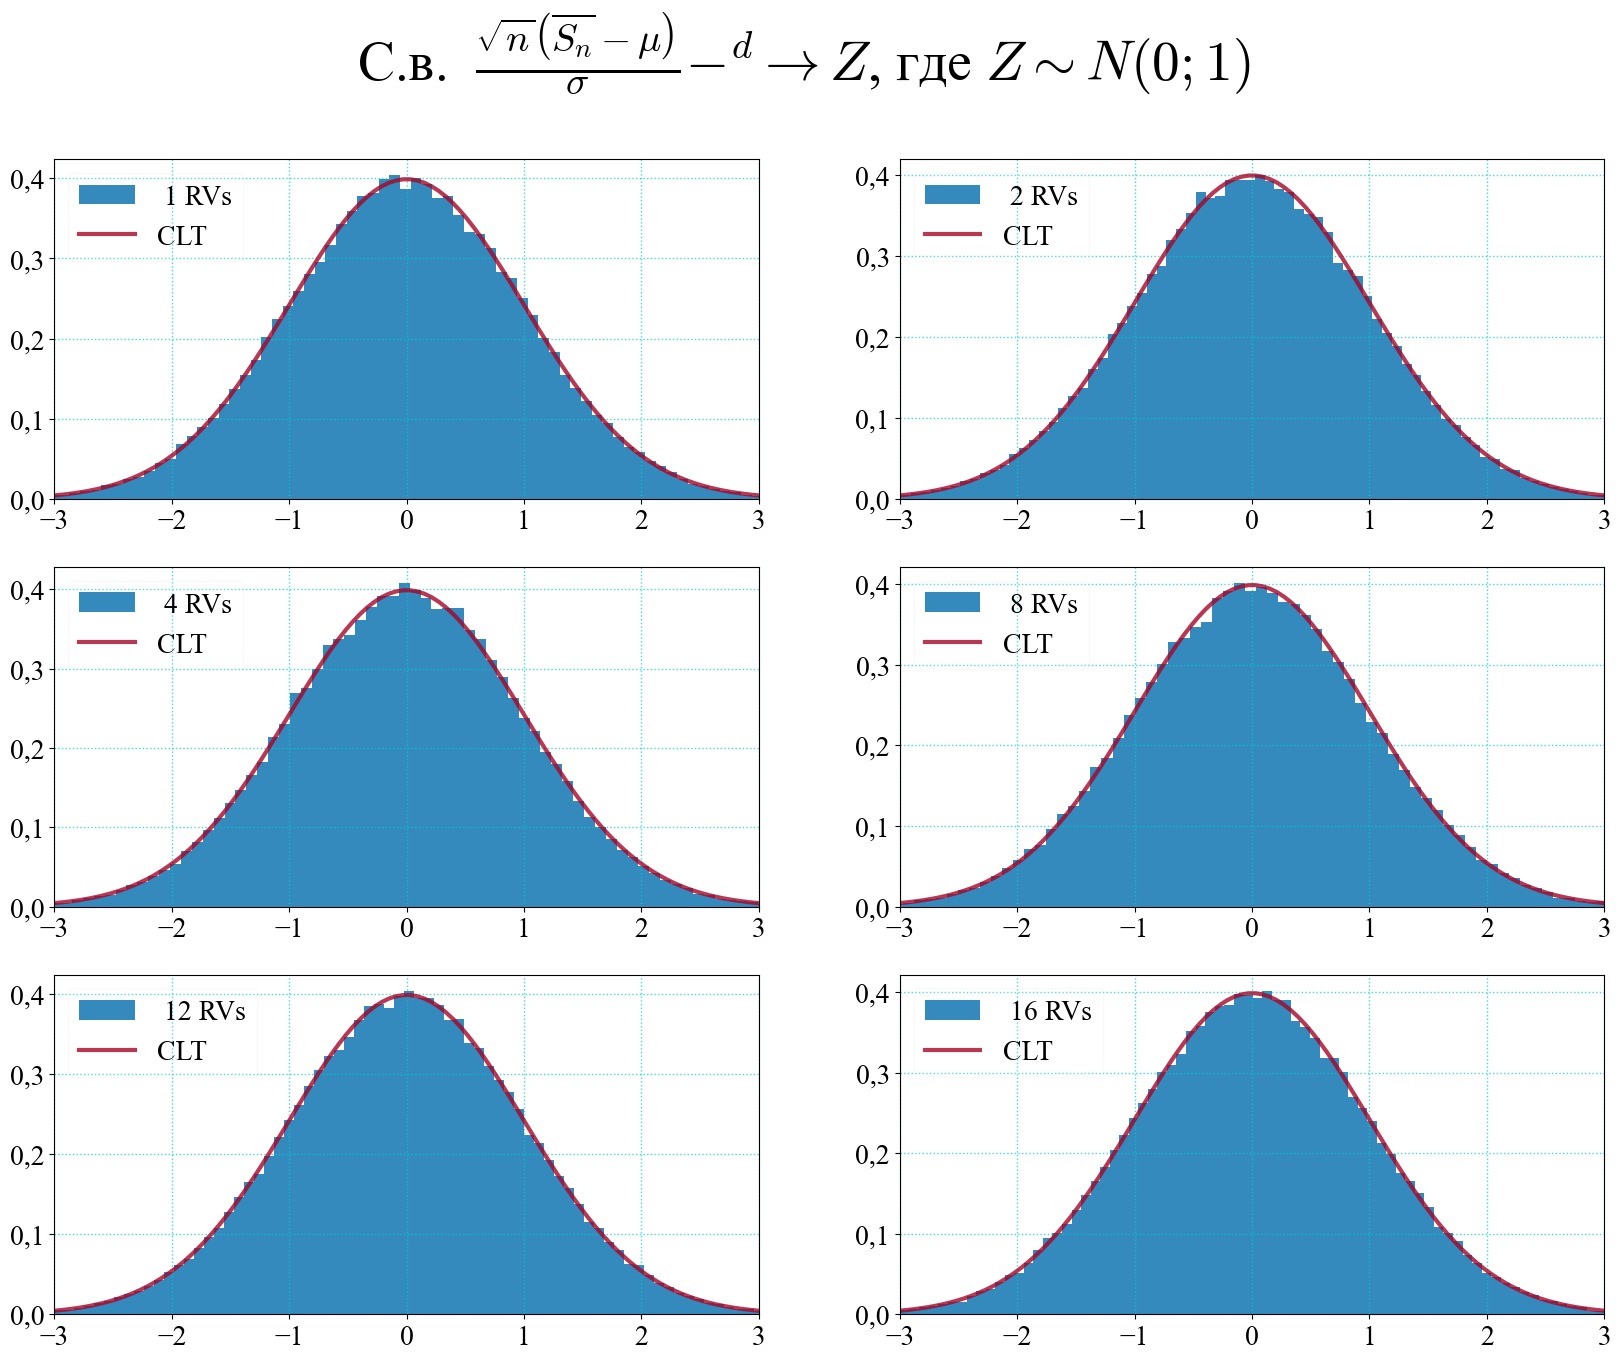

In [16]:
f = plt.figure(figsize=(20, 15))
 
def plotHist(nr, N, n_, mean, var0, x0):
    s = np.zeros((N))
    ax = f.add_subplot(3, 2, n_ )
    plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
    plt.tick_params(labelsize = 20)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1*nr))
    for i in range(N):    
        s[i] =np.sqrt(nr)*(np.mean(Z.rvs(size=nr)) - mean)/(np.sqrt(var0))
    plt.hist(s, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(ax.get_yticklabels(), visible=True)
                       
    pdf = 1/np.sqrt(2*np.pi)*np.exp(-(x0)**2/(2))
    plt.plot(x0,pdf,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    #plt.xlabel('r')
    plt.xlim([-3, 3])
    #plt.ylim([0, 15])
    leg = plt.legend(loc="upper left",fontsize=20)
    leg.get_frame().set_alpha(0.1)

    
N = 100000   
nrvs = ([1, 2, 4, 8, 12, 16])

mean, var0 = 0, 1  # 
x0 = np.linspace(-3, 3, 100)

for i in range(np.size(nrvs)):
    plotHist(nrvs[i], N, i+1, mean, var0, x0)

plt.suptitle(r'С.в.  $\frac{\sqrt{n}\left(\overline{S_n}-\mu\right)}{\sigma} {-}^d\rightarrow Z$, где $Z\sim {\cal N}(0;1)$',fontsize=40);
f.savefig("CLT_2.pdf", bbox_inches='tight')

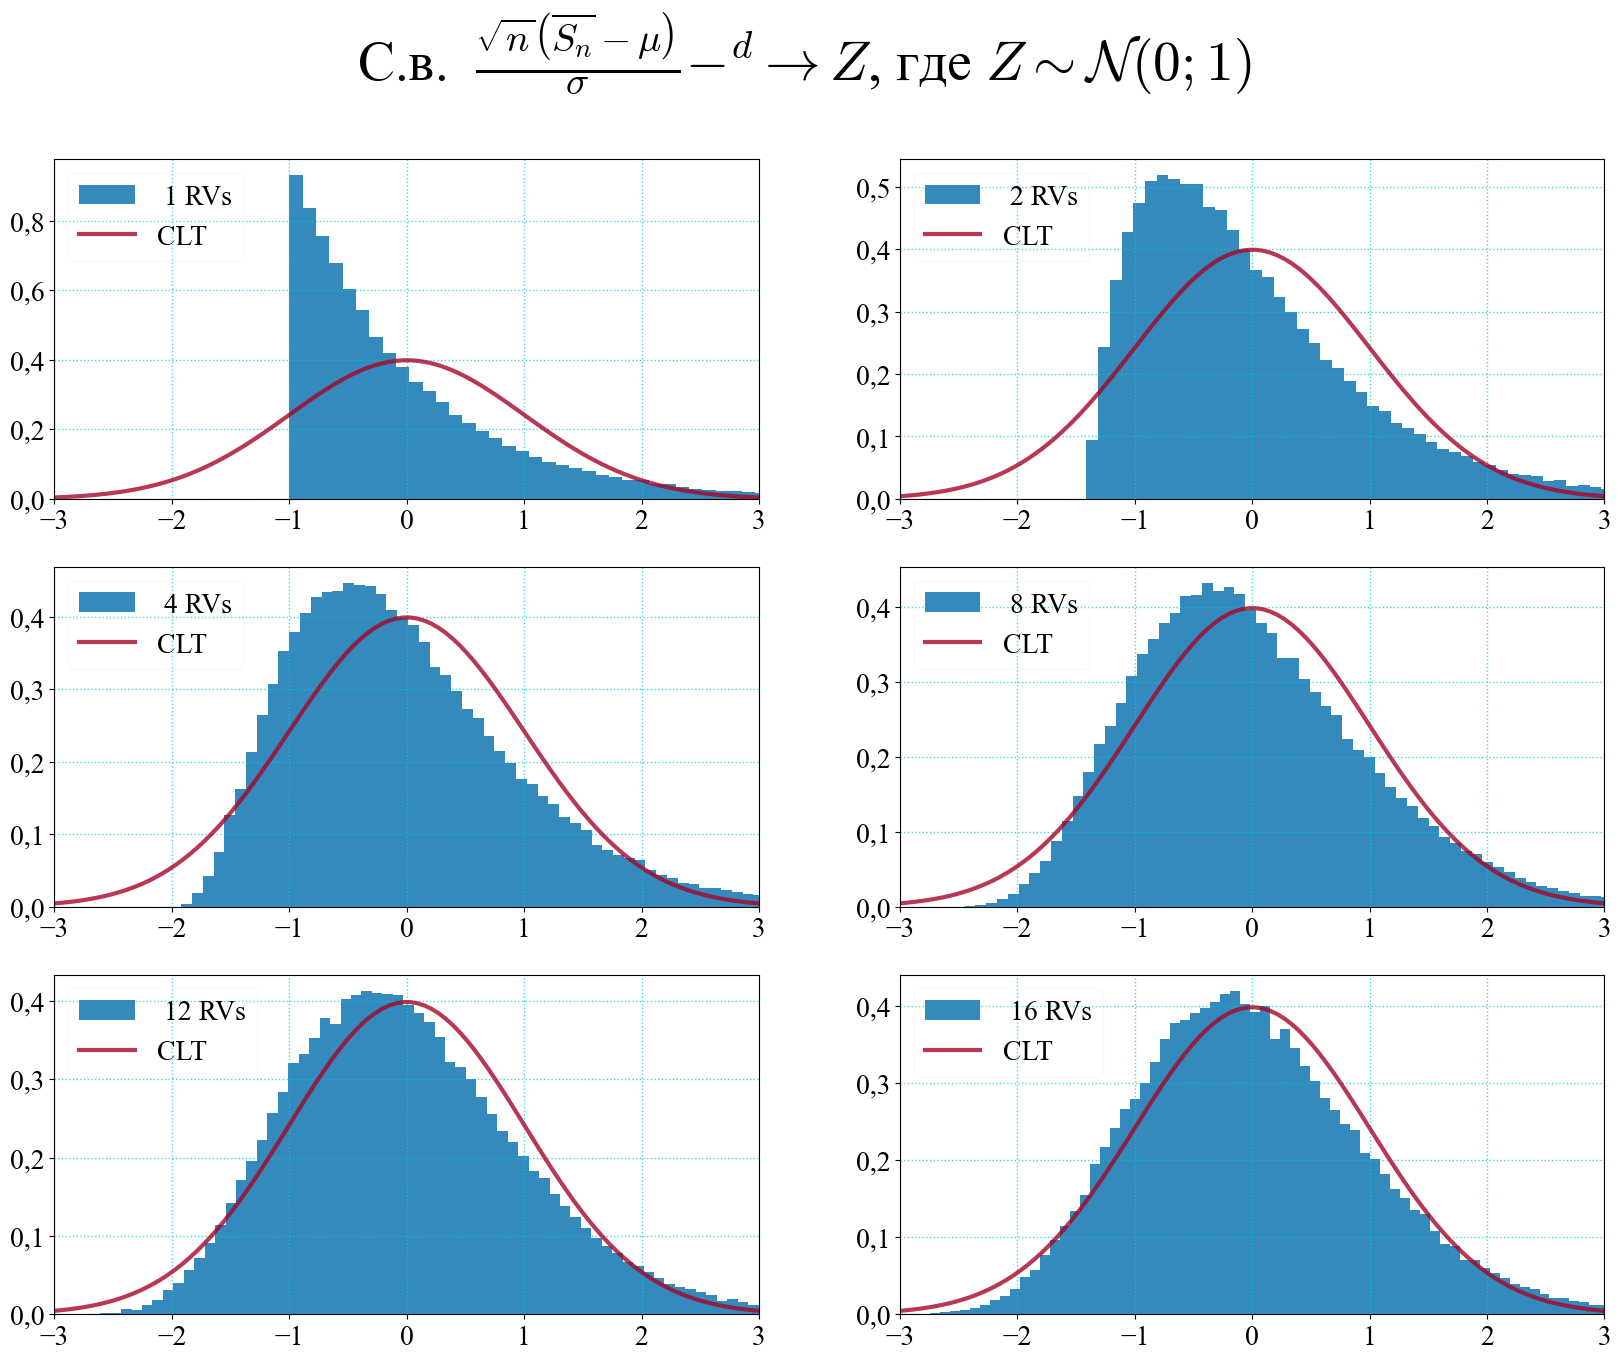

In [17]:
f = plt.figure(figsize=(20, 15))
 
def plotHist(nr, N, n_, mean, var0, x0):
    s = np.zeros((N))
    ax = f.add_subplot(3, 2, n_ )
    plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
    plt.tick_params(labelsize = 20)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1*nr))
    for i in range(N):    
        s[i] =np.sqrt(nr)*(np.mean(Y.rvs(size=nr)) - mean)/(np.sqrt(var0))
    plt.hist(s, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(ax.get_yticklabels(), visible=True)
                       
    pdf = 1/np.sqrt(2*np.pi)*np.exp(-(x0)**2/(2))
    plt.plot(x0,pdf,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    #plt.xlabel('r')
    plt.xlim([-3, 3])
    #plt.ylim([0, 15])
    leg = plt.legend(loc="upper left",fontsize=20)
    leg.get_frame().set_alpha(0.1)

    
N = 100000   
nrvs = ([1, 2, 4, 8, 12, 16])

mean, var0 = 1/lam, 1/lam*1/lam  # 
x0 = np.linspace(-3, 3, 100)

for i in range(np.size(nrvs)):
    plotHist(nrvs[i], N, i+1, mean, var0, x0)

plt.suptitle(r'С.в.  $\frac{\sqrt{n}\left(\overline{S_n}-\mu\right)}{\sigma} {-}^d\rightarrow Z$, где $Z\sim {\cal N}(0;1)$',fontsize=40);
f.savefig("CLT_3.pdf", bbox_inches='tight')

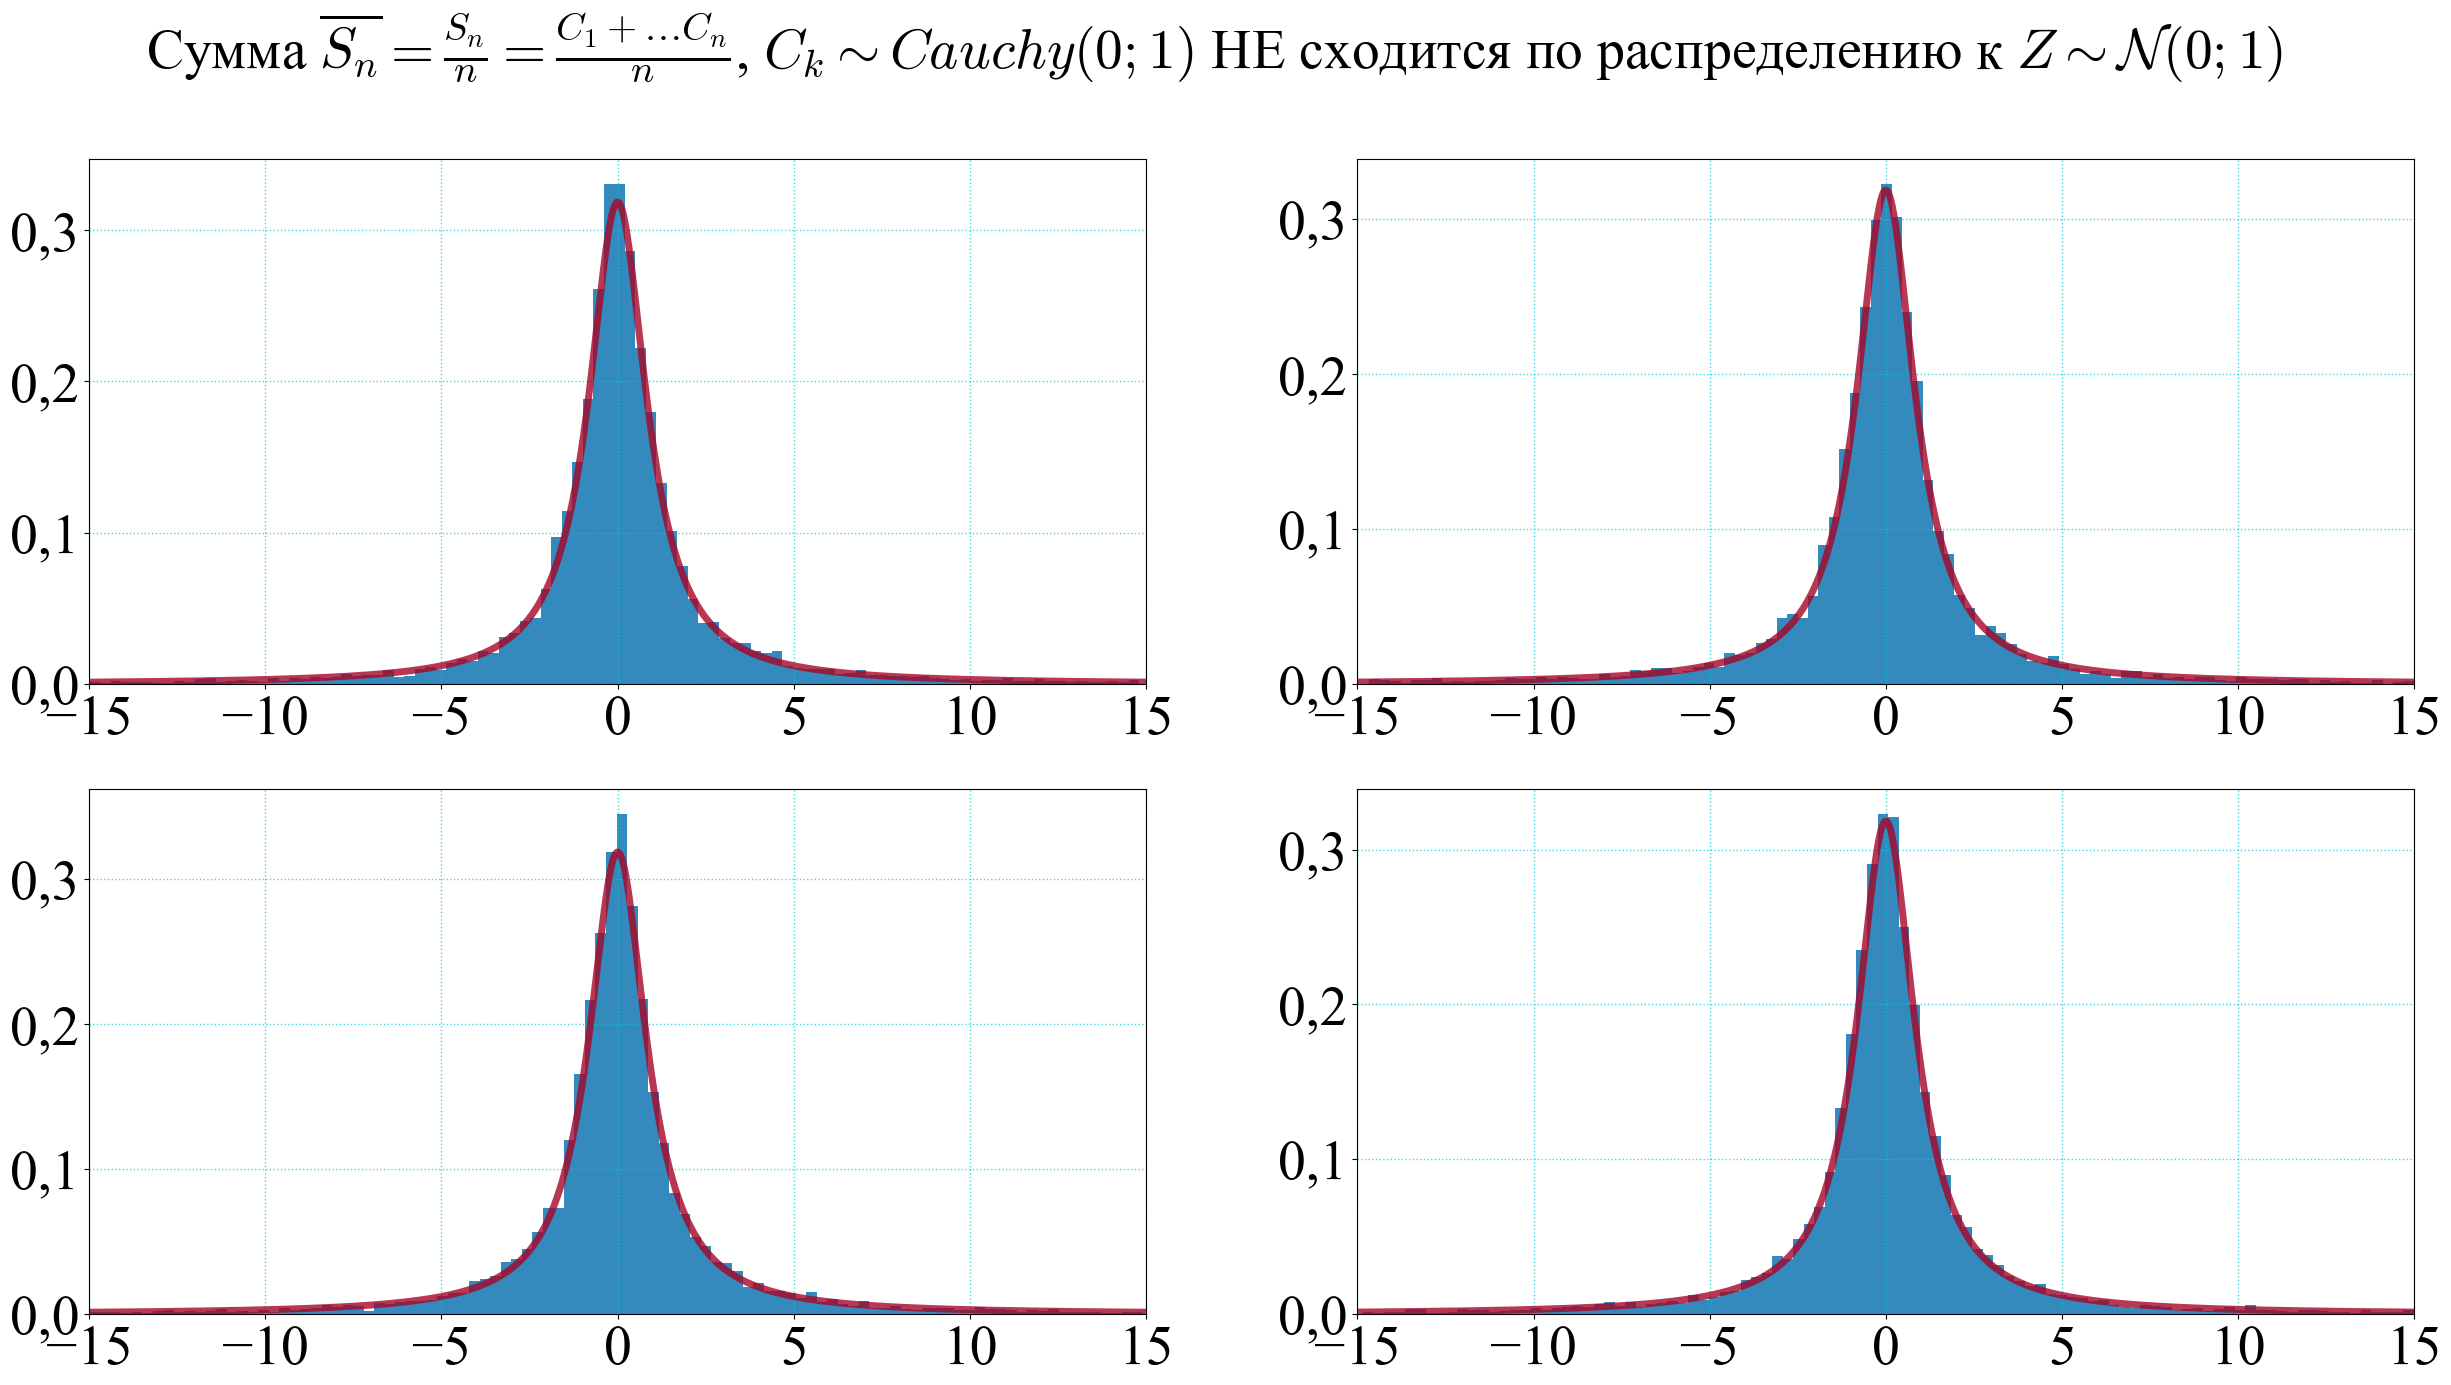

In [18]:
f = plt.figure(figsize=(30, 15))
 
def plotHist(nr, N, n_, mean, var0, x0):
    x = np.zeros((N))
    ax = f.add_subplot(2, 2, n_ )
    plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
    plt.tick_params(labelsize = 40)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    for i in range(N):    
        x[i] =np.mean(C.rvs(size=nr))     
    x = x[(x>-15) & (x<15)]
    plt.hist(x, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(ax.get_yticklabels(), visible=True)
    plt.xlim([-15, 15])
    
    pdf = 1/np.pi*1/(1+x0**2)
    plt.plot(x0,pdf,color='#A60628',linewidth=5,label='CLT',alpha=0.8)
N = 10000   
nrvs = ([1, 2, 4, 16])

mean, var0 = 0,1  # 
x0 = np.linspace(-15, 15, 10000)

for i in range(np.size(nrvs)):
    plotHist(nrvs[i], N, i+1, mean, var0, x0)

plt.suptitle(r"Сумма $\overline{S_n}=\frac{S_n}{n}=\frac{C_1+\ldots C_n}{n}$, $C_k\sim Cauchy(0;1)$ НЕ сходится по распределению к $Z\sim {\cal N}(0;1)$",fontsize=40);
f.savefig("CLT_4.pdf", bbox_inches='tight')